In [2]:
from distributed import Client
from os import cpu_count
print(cpu_count())
client = Client(n_workers=cpu_count())

8


/Users/caolingxin/.pyenv/versions/3.9.6/envs/oci-ai-ads/lib/python3.9/site-packages/distributed/node.py:183: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 52094 instead
  warnings.warn(
/Users/caolingxin/.pyenv/versions/3.9.6/envs/oci-ai-ads/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/caolingxin/.pyenv/versions/3.9.6/envs/oci-ai-ads/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/caolingxin/.pyenv/versions/3.9.6/envs/oci-ai-ads/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your ins

In [3]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [4]:
%%time
# 这需要三秒钟才能运行，
# 因为我们一个接一个地按顺序调用每个函数

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 348 ms, sys: 136 ms, total: 483 ms
Wall time: 3.01 s


In [5]:
from dask import delayed

In [6]:
%%time
# 这会立即运行，它所做的只是构建一个图

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 3.16 ms, sys: 7.79 ms, total: 10.9 ms
Wall time: 21.1 ms


In [7]:
%%time
# 这里才事实上地使用本地线程池运行我们的计算 

z.compute()

CPU times: user 462 ms, sys: 216 ms, total: 678 ms
Wall time: 2.37 s


5

In [8]:
z

Delayed('add-dbbc3b52-bfeb-4aa5-a2fc-1dadac8fbe69')

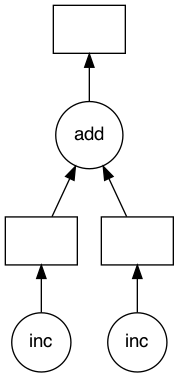

In [13]:
# 查看`z`的任务图
# 译者注:除了适用conda或pip安装python-graphviz，还需要在系统上安装graphviz。以ubuntu为例:sudo apt install graphviz
z.visualize()

In [10]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [11]:
%%time
# 串行代码

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 933 ms, sys: 340 ms, total: 1.27 s
Wall time: 8.04 s


In [12]:
total

44

In [42]:
%%time
# 并行代码

results = []
for x in data:
    y = delayed(inc)(x)
    delayed(results.append(y))
    
total = delayed(sum)(results)

CPU times: user 3.28 ms, sys: 2.47 ms, total: 5.75 ms
Wall time: 4.01 ms


In [43]:
total

Delayed('sum-14d64d9c-dd67-4260-a826-942e1e99f090')

In [44]:
total.compute()

44

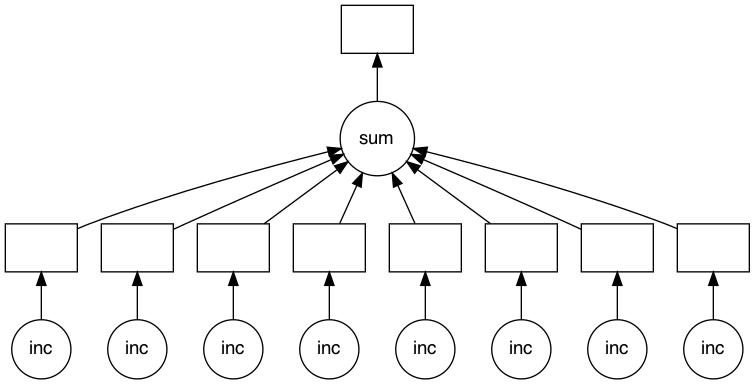

In [45]:
total.visualize()

In [46]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [47]:
%%time
# 串行代码

results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)
    
total = sum(results)
print(total)

90
CPU times: user 1.93 s, sys: 695 ms, total: 2.63 s
Wall time: 10.1 s


In [ ]:
%%time
# 将你的并行代码写在这儿。。。
# 目标: 使用 dask.delayed 并行化上面的串行代码
# 你需要延迟某些功能，但不是全部

In [ ]:
%time total.compute()

In [ ]:
total.visualize()

In [58]:
import os
tutorial_dir = os.getcwd()+"/dask_tutorial_assets";
print(tutorial_dir)

/Users/caolingxin/Documents/workspaces/oci-projects/oci-ai-ads/dask_tutorial_assets


In [57]:
os.system("python "+tutorial_dir+"/prep.py -d flights")

/Users/caolingxin/.pyenv/versions/3.9.6/envs/oci-ai-ads/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


- 正在下载纽约市航班数据集...完成
- 提取飞行数据...完成
- 正在创建 json 数据...完成
** 已创建飞行数据集! 在 19.40秒内完成**


0

In [59]:
sorted(os.listdir(os.path.join(tutorial_dir, 'data', 'nycflights')))

['1990.csv',
 '1991.csv',
 '1992.csv',
 '1993.csv',
 '1994.csv',
 '1995.csv',
 '1996.csv',
 '1997.csv',
 '1998.csv',
 '1999.csv']

In [60]:
import pandas as pd
df = pd.read_csv(os.path.join(tutorial_dir, 'data', 'nycflights', '1990.csv'))
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [61]:
# 是什么样的数据类型？
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
dtype: object

In [62]:
# 数据中包含哪些始发机场？
df.Origin.unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [63]:
# 每个机场的年平均离港延误
df.groupby('Origin').DepDelay.mean()

Origin
EWR     9.168411
JFK    11.857274
LGA     8.560045
Name: DepDelay, dtype: float64

In [64]:
from glob import glob
filenames = sorted(glob(os.path.join(tutorial_dir, 'data', 'nycflights', '*.csv')))

In [84]:
%%time
#串行
sums = []
counts = []
for fn in filenames:
    # 读取文件
    df = pd.read_csv(fn)
    
    # Groupby出发地机场
    by_origin = df.groupby('Origin')
    
    # 所有始发航班延误的总和
    total = by_origin.DepDelay.sum()
    
    # 始发航班数
    count = by_origin.DepDelay.count()
    
    # 保存中间变量
    sums.append(total)
    counts.append(count)

# 合并中间量以获得总的平均始发延迟
total_delays = sum(sums)
n_flights = sum(counts)
mean = total_delays / n_flights

CPU times: user 4.83 s, sys: 1.63 s, total: 6.46 s
Wall time: 5.99 s


In [93]:
%%time
#并行
sums = []
counts = []
for fn in filenames:
    # 读取文件
    df = delayed(pd.read_csv(fn))
    
    # Groupby出发地机场
    by_origin = delayed(df.groupby('Origin'))
    
    # 所有始发航班延误的总和
    total = delayed(by_origin.DepDelay.sum())
    
    # 始发航班数
    count = delayed(by_origin.DepDelay.count())
    
    # 保存中间变量
    sums.append(total)
    counts.append(count)

# 合并中间量以获得总的平均始发延迟
total_delays = delayed(sum)(sums)
n_flights = delayed(sum)(counts)
mean = total_delays / n_flights

CPU times: user 4.27 s, sys: 1.38 s, total: 5.65 s
Wall time: 5.26 s


In [94]:
mean

Delayed('truediv-aabd97df9041ba74af331e235278125d')

In [95]:
%%time
mean.compute()

CPU times: user 553 ms, sys: 705 ms, total: 1.26 s
Wall time: 1.5 s


Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

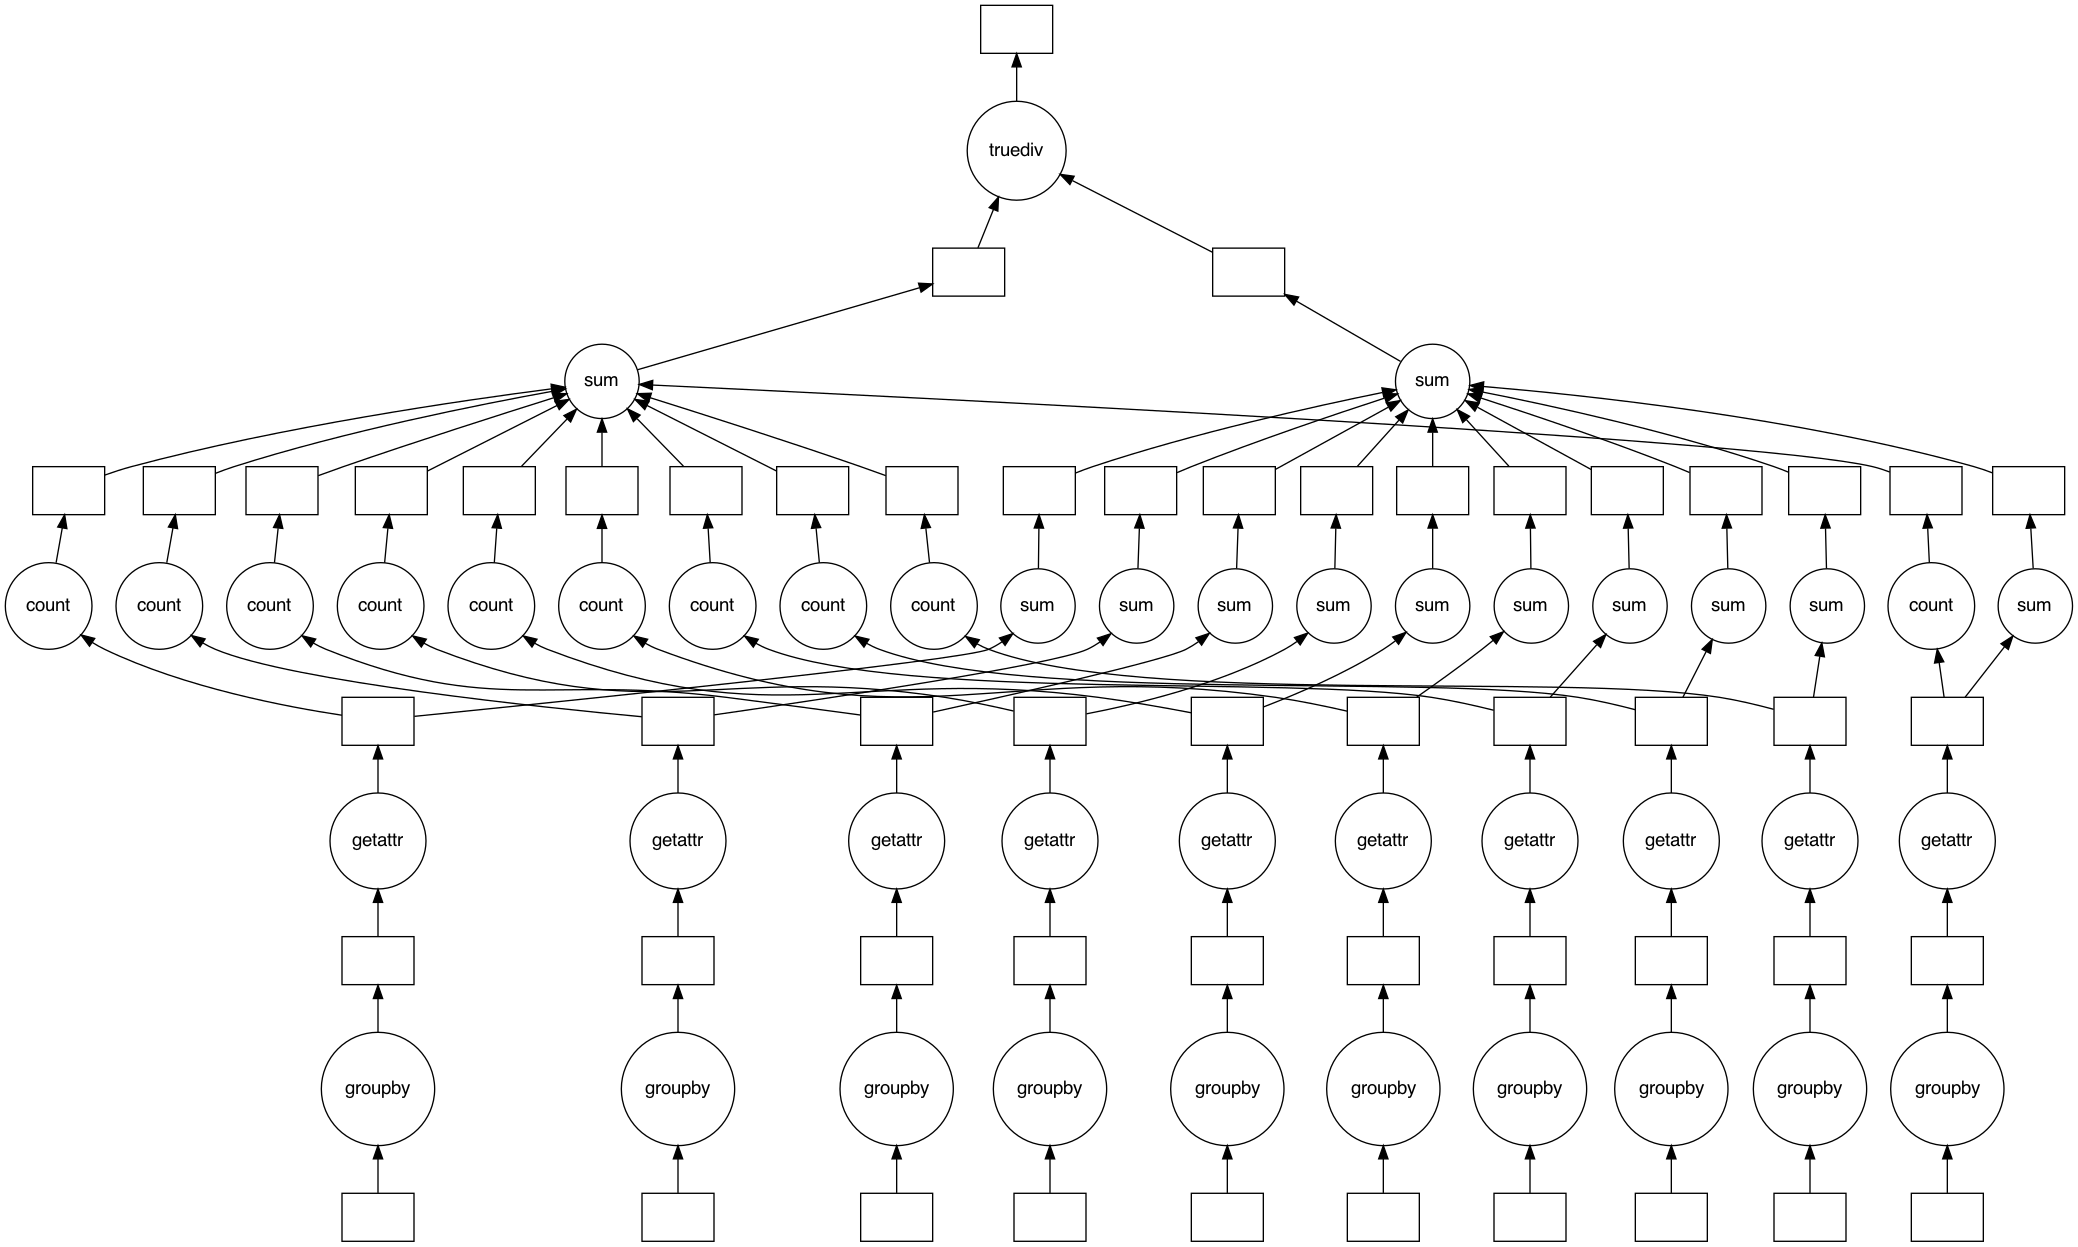

In [96]:
mean.visualize()